In [1]:
import tensorflow as tf
import tensorflow.keras as k
import helper_functions as h

## Old
$ \boldsymbol{X} = \begin{bmatrix} \boldsymbol x^1 & \boldsymbol{x}^2  & \dots & \boldsymbol x^m \end{bmatrix} $
<br>$ where \qquad \boldsymbol x^i = \begin{bmatrix}
f_1 \\ f_2 \\ f_3  \\ \vdots  \\ f_d 
\end{bmatrix}
\qquad \qquad \qquad$ 
So &emsp; $\boldsymbol x^i \rightarrow shape=(d,1)$ 
&emsp; and &emsp; $\boldsymbol X \rightarrow shape=(d,m)$
<br>$ \boldsymbol{Y} = \begin{bmatrix} y^1 & y^2  & \dots & y^m \end{bmatrix} 
\\ where \qquad y^i \text{ is 0/1} \qquad \qquad \qquad \quad$
So &emsp; $\boldsymbol Y \rightarrow shape=(1,m)$ 

## Now
$ \boldsymbol{X} = \begin{bmatrix} \quad \boldsymbol x^1 \quad 
\\ \quad \boldsymbol{x}^2 \quad \\ \quad \vdots \quad \\ \quad \boldsymbol x^m \quad \end{bmatrix} $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 & f_2 & f_3 & \dots \quad f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(m,d)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,d)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 \\ y^2 \\ \vdots \\ y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(m,1)}$ 

$ \boldsymbol \omega = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ \vdots \\ w_d \end{bmatrix},\qquad b $
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,1)}$
$,\qquad \qquad \qquad b \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,)}$ 

build-in linear(X)
<br>
$ \boldsymbol{z/linear/dense} = \boldsymbol{X \omega}+b 
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(m,1)=(m,d)\times(d,1)} $
<br>
$ \boldsymbol z = \begin{bmatrix} z^1 \\ z^2 \\ \vdots \\ z^m \end{bmatrix} $

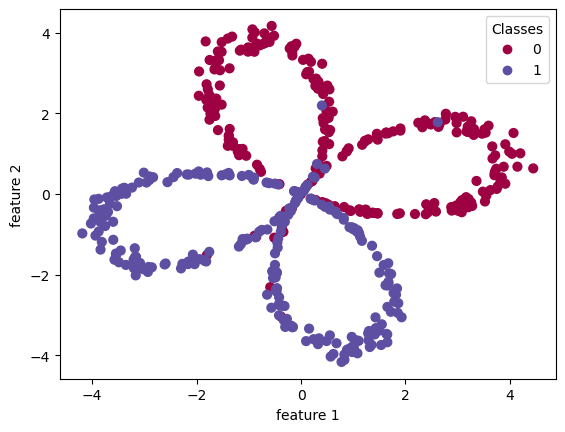

In [2]:
X_np, Y_np = h.load_flower_dataset(num_samples=500, petals=2, angle=30)
h.plot_scatter(X_np, Y_np)

In [3]:
X = tf.convert_to_tensor(X_np.T, dtype=tf.float32)    # (m,d)=(500,2)
Y = tf.convert_to_tensor(Y_np.T, dtype=tf.float32)    # (m,1)=(500,1)

In [4]:
%reset_selective -f ^(?!X$|Y$|tf$|k$|h$|X_np$|Y_np$).*
# Create the model
model = k.models.Sequential()
model.add( k.layers.Dense(units=1, activation='sigmoid', input_shape=(X.shape[-1],),kernel_initializer=k.initializers.Zeros(),
    bias_initializer=k.initializers.Zeros()) )
model.summary()

# Compile the model
model.compile(
    optimizer=k.optimizers.SGD(learning_rate=0.005),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[k.metrics.BinaryAccuracy()],
)

# Train the model
hist = model.fit(X, Y, epochs=100, shuffle=False, batch_size=X.shape[0])

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X, Y)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
# hist.history["binary_accuracy"]
# hist.history["loss"]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 941ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6900 - binary_accuracy: 0.9480
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6869 - binary_accuracy: 0.9480
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6837 - binary_accuracy: 0.9480
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6807 - binary_accuracy: 0.9480
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - los

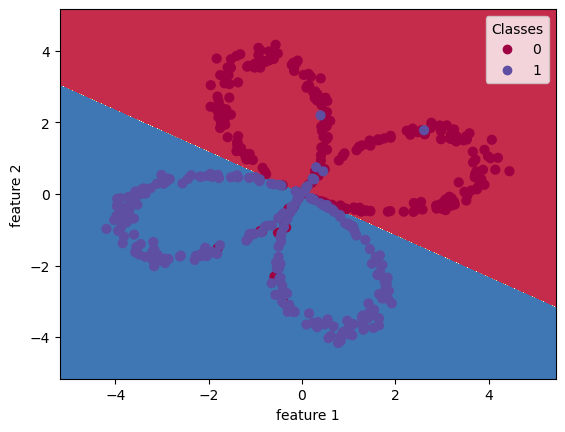

In [5]:
h.plot_decision_boundary(model.weights[0].numpy(), model.weights[1].numpy(), X_np, Y_np)